# CNN

In [70]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load and preprocess Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Reshape for CNN input (add channel dimension)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
# Build the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Display the model summary
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Train the model
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.7573 - loss: 1.1562 - val_accuracy: 0.8610 - val_loss: 0.3996
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.8710 - loss: 0.3566 - val_accuracy: 0.8687 - val_loss: 0.3627
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8918 - loss: 0.3016 - val_accuracy: 0.8693 - val_loss: 0.3637
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8927 - loss: 0.2885 - val_accuracy: 0.8850 - val_loss: 0.3314
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9018 - loss: 0.2662 - val_accuracy: 0.8839 - val_loss: 0.3259
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9081 - loss: 0.2489 - val_accuracy: 0.8918 - val_loss: 0.3111
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9138 - loss: 0.2306 - val_accuracy: 0.8903 - val_loss: 0.3172
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9191 -

In [58]:
# Evaluate the model on test data
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print("\nCNN Test Accuracy:", cnn_test_acc)

313/313 - 3s - 8ms/step - accuracy: 0.8901 - loss: 0.3304

CNN Test Accuracy: 0.8901000022888184


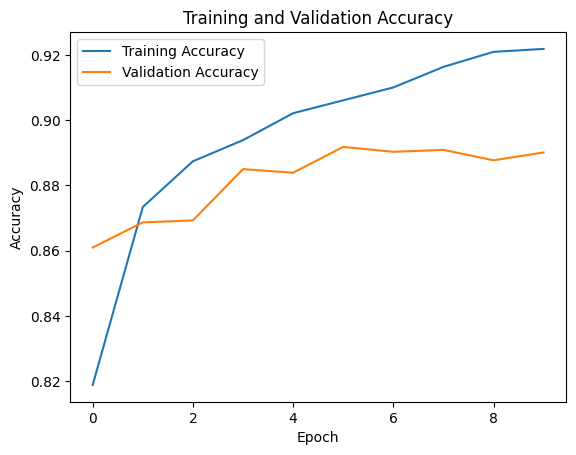

In [59]:
# Plot training & validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

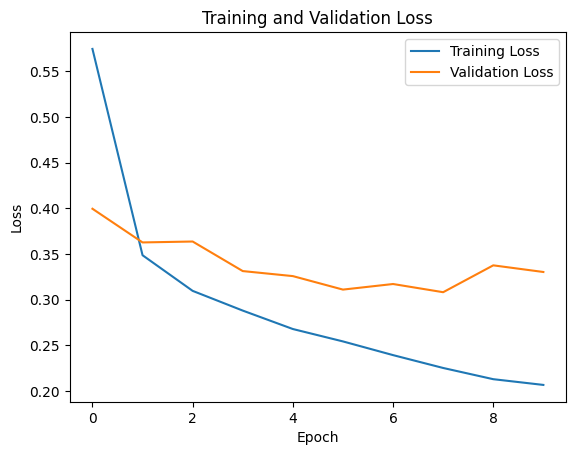

In [60]:
# Plot training & validation loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MLP

In [32]:
# Load and preprocess Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [34]:
# preprocess
def preprocess_for_mlp(X_train, X_test, y_train, y_test):
    #Preprocess data for MLP
    #Normalize pixel Values
    X_train = X_train.astype("float32") / 255.0
    X_test = X_test.astype("float32") / 255.0

    return X_train, X_test, y_train, y_test


In [ ]:

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Flatten images for MLP input (from 28x28 to 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Apply the MLP-specific preprocessing (normalization)
X_train, X_test, y_train, y_test = preprocess_for_mlp(X_train, X_test, y_train, y_test)

In [61]:
mlp_model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
mlp_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [63]:
mlp_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Train model
mlp_history = mlp_model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=128,
        validation_data=(X_test, y_test),
        verbose=1
    )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6786 - loss: 0.9164 - val_accuracy: 0.8363 - val_loss: 0.4521
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8422 - loss: 0.4482 - val_accuracy: 0.8536 - val_loss: 0.4075
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8533 - loss: 0.4073 - val_accuracy: 0.8525 - val_loss: 0.4029
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8656 - loss: 0.3743 - val_accuracy: 0.8636 - val_loss: 0.3771
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8735 - loss: 0.3565 - val_accuracy: 0.8654 - val_loss: 0.3721
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8730 - loss: 0.3440 - val_accuracy: 0.8754 - val_loss: 0.3529
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8779 - loss: 0.3285 - val_accuracy: 0.8745 - val_loss: 0.3449
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8813 - loss: 0.3227 - val_accuracy: 0.

In [65]:
# Evaluate
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"\nMLP Test Accuracy: {mlp_test_acc:.4f}")


MLP Test Accuracy: 0.8808


# Compare Their Performance Metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MLP Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       1.00      0.95      0.97      1000
    Pullover       0.83      0.73      0.78      1000
       Dress       0.87      0.90      0.89      1000
        Coat       0.76      0.85      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.70      0.68      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

MLP Confusion Matrix


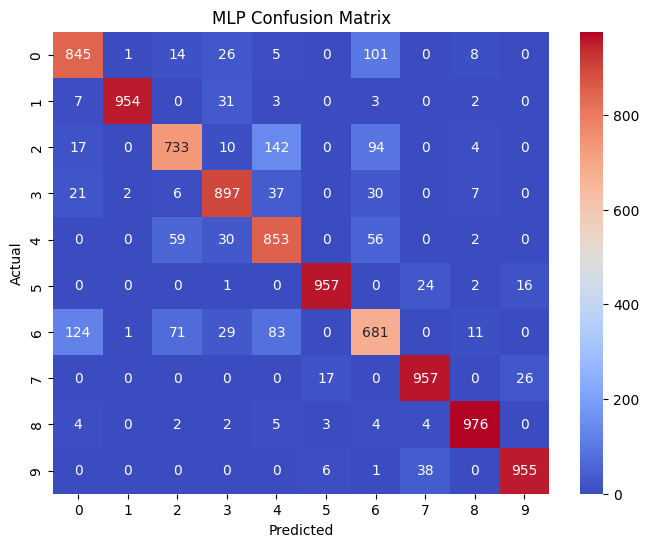

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
CNN Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.81      0.83      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.84      0.82      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.69      0.70      0.70      1000
     Sneaker       0.97      0.93      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

CNN Confusion Matrix


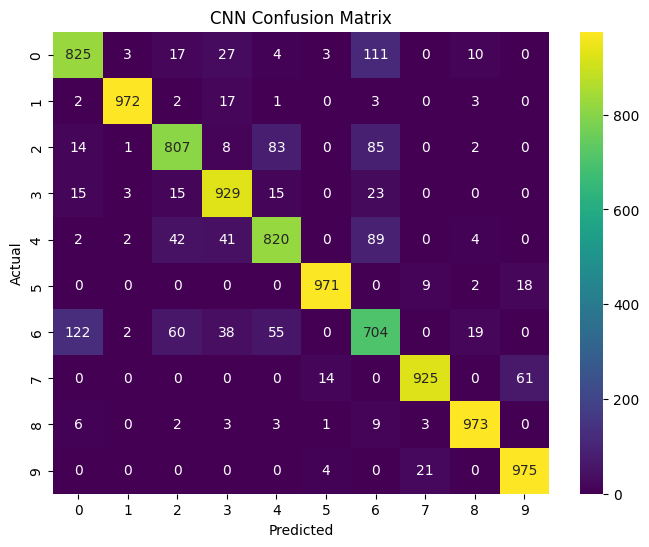

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

# MLP results
mlp_pred = mlp_model.predict(X_test)
mlp_pred_classes = mlp_pred.argmax(axis=1)

print("MLP Classification Report")
print(classification_report(y_test, mlp_pred_classes, target_names=class_names))

print("MLP Confusion Matrix")
mlp_cm = confusion_matrix(y_test, mlp_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# CNN results
cnn_pred = cnn_model.predict(test_images)
cnn_pred_classes = cnn_pred.argmax(axis=1)

print("CNN Classification Report")
print(classification_report(test_labels, cnn_pred_classes, target_names=class_names))

print("CNN Confusion Matrix")
cnn_cm = confusion_matrix(y_test, cnn_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='viridis')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Compare Their Learning Curves

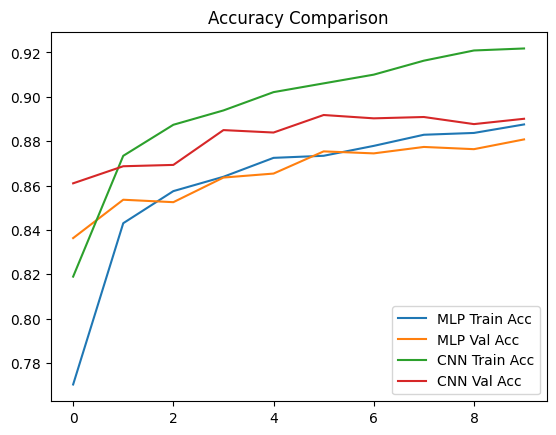

In [67]:
import matplotlib.pyplot as plt

plt.plot(mlp_history.history['accuracy'], label='MLP Train Acc')
plt.plot(mlp_history.history['val_accuracy'], label='MLP Val Acc')
plt.plot(cnn_history.history['accuracy'], label='CNN Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Acc')
plt.legend()
plt.title("Accuracy Comparison")
plt.show()

# Overall Accuracy Comparison
Model	Accuracy
- MLP	0.88
- CNN	0.89

CNN performs slightly better overall (as expected for image data), but the improvement is small.

# Class-by-Class Comparison
**Classes where CNN performs better:**

- Dress (F1: 0.90 vs 0.89)

- Coat (0.83 vs 0.80)

- Pullover (0.83 vs 0.78)

- T-shirt/top (similar but more stable)

- Trouser (0.98 vs 0.97)

- Sandal (0.97 vs 0.97, same)

- Bag & Boot (almost identical)

CNN’s strength: better with complex shapes and textures.

**Classes where MLP performs slightly better:**

Shirt

- MLP f1 = 0.69
- CNN f1 = 0.70

Sneaker
- MLP: 0.95
- CNN: 0.94

These are minor differences.

# Key Insights
CNN has higher macro & weighted averages
- CNN macro avg F1: 0.89
- MLP macro avg F1: 0.88

CNN handles spatial patterns better
- Pullover, coat, dress — CNN clearly wins here.

MLP performs close
- This is normal when images are simple (28×28) and grayscale.

Shirt remains the hardest category

- Both models struggle with Shirt because:
    - It looks similar to T-shirt/top, Pullover, Coat


# CONCLUSION

- Both the MLP and CNN models performed well on the Fashion-MNIST dataset, but the CNN achieved slightly better overall performance.
- The CNN obtained an accuracy of 89% compared to the MLP’s 88%. It also produced higher F1-scores for difficult classes such as Pullover, Coat, and Dress, because CNNs preserve spatial patterns through convolutional filters.

- The MLP performed similarly on simpler classes like Trouser, Sandal, Bag, and Ankle Boot, but struggled more with visually similar classes due to the flattening of image inputs, which removes spatial information.

- Overall, the CNN is the better model for this task because it generalises better to image features, even though the performance gap is small.